In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l = 41
np.set_printoptions(precision=3, suppress=True)
a, b = -1, 1
A = np.linspace(a, b, l)
print(len(A))
h = (b - a) / l
q_j = 4
p_j = ...
alfa = 4
beta = 3/2 # 3/4

41


In [3]:
F = [[0 for i in range(l)] for j in range(l)]
v = [0 for i in range(l)]
for i in range(0, l):
    p_j = A[i]
    x = A[i]
    if i == 0:
        F[i][i] = 1
        v[i] = alfa
        # print("start", i)
    elif i == len(F) - 1:
        F[i][i] = 1
        v[i] = 3*alfa + 2*beta
        # print("end", i)
    else:
        F[i][i-1] = (1/h**2 - p_j/(2*h))
        F[i][i] = (-2/(h**2) - q_j)
        F[i][i+1] = (1/h**2 + p_j/(2*h))
        v[i] = -x**3 * alfa + 2 * (6*alfa - beta)*x**2 + (2*alfa - beta)*(3*x - 2)
print("F:", F)
print("v:", v)

F: [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [np.float64(429.9875), -844.5, np.float64(410.5125), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, np.float64(429.475), -844.5, np.float64(411.025), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, np.float64(428.9625), -844.5, np.float64(411.5375), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, np.float64(428.45), -844.5, np.float64(412.05), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, np.float64(427.9375), -844.5, np.float64(412.5625), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, np.float64(427.425), 

### Метод прогонки
#### Прямой ход

In [4]:
L = [0 for i in range(l)]
M = [0 for i in range(l)]
L[0] = -F[0][1] / F[0][0]
M[0] = v[0] / F[0][0]
for i in range(1, l - 1):
    L[i] = - F[i][i + 1] / (L[i-1]*F[i][i-1] + F[i][i])
    M[i] = (v[i] - M[i-1]*F[i][i-1])/(L[i-1]*F[i][i-1] + F[i][i])
M[-1] = (v[-1] - M[-2]*F[-1][-2])/(L[-2]*F[-1][-2] + F[-1][-1])
x = [0 for i in range(l)]
x[-1] = M[-1]
print("M:", M[-1])

M: 15.0


#### Обратный ход

In [5]:
for i in range(l-2, -1, -1):
    x[i] = x[i + 1] * L[i] + M[i]
print("x:", x)

x: [np.float64(4.0), np.float64(3.769537509524988), np.float64(3.595362934853026), np.float64(3.4698081055413565), np.float64(3.38576939449694), np.float64(3.3367090664566716), np.float64(3.3166565462569304), np.float64(3.320209600154293), np.float64(3.3425354236440628), np.float64(3.379371629465396), np.float64(3.427027129780979), np.float64(3.4823829068743004), np.float64(3.5428926671168397), np.float64(3.606583373418387), np.float64(3.6720556518829857), np.float64(3.7384840689467076), np.float64(3.805617275867053), np.float64(3.873778018062008), np.float64(3.9438630074540195), np.float64(4.017342656654176), np.float64(4.096260674518192), np.float64(4.183233523311591), np.float64(4.281449738429776), np.float64(4.394669112322459), np.float64(4.527221744964086), np.float64(4.684006963885669), np.float64(4.870492117432103), np.float64(5.092711245526266), np.float64(5.3572636328012), np.float64(5.671312249498899), np.float64(6.042582086024093), np.float64(6.479358387479556), np.float64(6

### Сравнение результатов с аналитическим решением

In [6]:
phi = [0 for i in range(l)]
for i in range(l):
    phi[i] = 4*A[i]**4 + 4*A[i]**3 + 3/2*A[i]**2 + 3/2*A[i] + 4
print("phi:", np.array(phi))

phi: [ 4.     3.757  3.573  3.44   3.35   3.297  3.273  3.274  3.294  3.329
  3.375  3.428  3.486  3.547  3.609  3.672  3.734  3.797  3.861  3.928
  4.     4.079  4.169  4.274  4.398  4.547  4.725  4.94   5.198  5.507
  5.875  6.31   6.822  7.421  8.117  8.922  9.846 10.903 12.105 13.466
 15.   ]


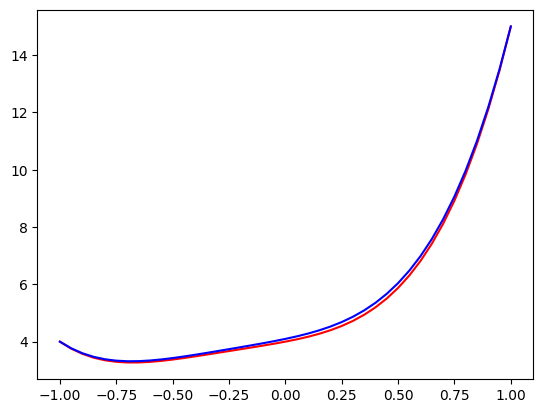

In [7]:
plt.plot(A, phi, color="red")
plt.plot(A, x, color="blue")
plt.show()

### нахождение погрешности по правилу Рунге

In [8]:
def solve_eq(a, b, l, alfa, beta, verbose=0) -> list:
    l = l
    np.set_printoptions(precision=3, suppress=True)
    a, b = a, b
    A = np.linspace(a, b, l)
    if verbose:
        print("size of the grid:", len(A))
    h = (b - a) / l
    q_j = 4
    p_j = ...
    alfa = alfa
    beta = beta
    
    F = [[0 for i in range(l)] for j in range(l)]
    v = [0 for i in range(l)]
    for i in range(0, l):
        p_j = A[i]
        x = A[i]
        if i == 0:
            F[i][i] = 1
            v[i] = alfa
            # print("start", i)
        elif i == len(F) - 1:
            F[i][i] = 1
            v[i] = 3*alfa + 2*beta
            # print("end", i)
        else:
            F[i][i-1] = (1/h**2 - p_j/(2*h))
            F[i][i] = (-2/(h**2) - q_j)
            F[i][i+1] = (1/h**2 + p_j/(2*h))
            v[i] = -x**3 * alfa + 2 * (6*alfa - beta)*x**2 + (2*alfa - beta)*(3*x - 2)
    if verbose:
        print("F:", np.array(F))
        print("v:", np.array(v))
        print("метод прогонки (run-through method):")
    
    L = [0 for i in range(l)]
    M = [0 for i in range(l)]
    L[0] = -F[0][1] / F[0][0]
    M[0] = v[0] / F[0][0]
    if verbose:
        print("L[0]=", L[0])
        print("M[0]=", M[0])
    for i in range(1, l - 1):
        L[i] = - F[i][i + 1] / (L[i-1]*F[i][i-1] + F[i][i])
        M[i] = (v[i] - M[i-1]*F[i][i-1])/(L[i-1]*F[i][i-1] + F[i][i])
        if verbose:
            print(f"L[{i}]=", L[i])
            print(f"M[{i}]=", M[i])
    M[-1] = (v[-1] - M[-2]*F[-1][-2])/(L[-2]*F[-1][-2] + F[-1][-1])
    x = [0 for i in range(l)]
    x[-1] = M[-1]
    if verbose:
        print("M[k] = x_k =", M[-1])
        
    for i in range(l-2, -1, -1):
        x[i] = x[i + 1] * L[i] + M[i]
    if verbose:
        print("x:", np.array(x))
    return np.array(x)

In [9]:
phi = np.array(phi)
x = np.array(x)
x2 = solve_eq(a, b, l*2 - 1, alfa, beta, verbose=0)
# Чебышёвская норма ошибки
eps = np.max(np.abs(phi - x))
# Ошибка по правилу Рунге
print(len(x), len(x2))
x2 = [x2[i] for i in range(0, l*2 - 1, 2)]
print("x2:", np.array(x2))
eps2 = np.max(np.abs(x - x2)) / (2^2 - 1)
print(eps, eps2)

41 81
x2: [ 4.     3.763  3.584  3.455  3.368  3.316  3.294  3.297  3.318  3.354
  3.4    3.454  3.514  3.576  3.64   3.704  3.769  3.834  3.902  3.972
  4.047  4.13   4.224  4.334  4.462  4.615  4.797  5.016  5.277  5.589
  5.958  6.395  6.906  7.503  8.196  8.994  9.911 10.957 12.145 13.488
 15.   ]
0.16908338747955565 0.028270383513054814


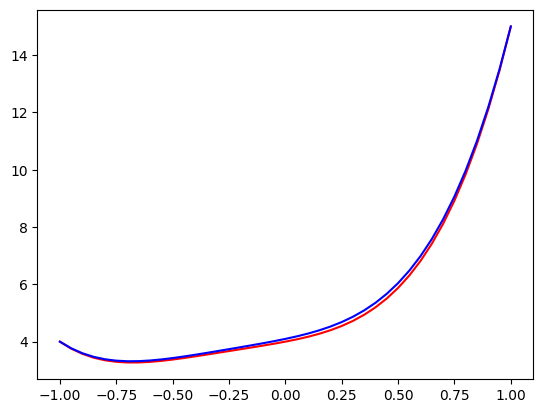

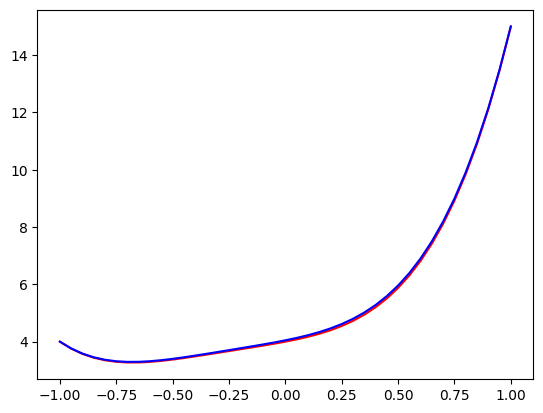

In [10]:
plt.plot(A, phi, color="red")
plt.plot(A, x, color="blue")
plt.show()

plt.plot(A, phi, color="red")
plt.plot(A, x2, color="blue")
plt.show()

### Полный вывод по решению

In [11]:
solve_eq(a, b, l, alfa, beta, verbose=1)

size of the grid: 41
F: [[   1.       0.       0.    ...    0.       0.       0.   ]
 [ 429.988 -844.5    410.512 ...    0.       0.       0.   ]
 [   0.     429.475 -844.5   ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ... -844.5    429.475    0.   ]
 [   0.       0.       0.    ...  410.512 -844.5    429.988]
 [   0.       0.       0.    ...    0.       0.       1.   ]]
v: [  4.     12.517   8.816   5.394   2.248  -0.625  -3.228  -5.564  -7.636
  -9.447 -11.    -12.298 -13.344 -14.141 -14.692 -15.    -15.068 -14.899
 -14.496 -13.862 -13.    -11.913 -10.604  -9.076  -7.332  -5.375  -3.208
  -0.834   1.744   4.523   7.5    10.672  14.036  17.589  21.328  25.25
  29.352  33.631  38.084  42.708  15.   ]
метод прогонки (run-through method):
L[0]= 0.0
M[0]= 4.0
L[1]= 0.486101243339254
M[1]= 2.021827116637063
L[2]= 0.6465385009982247
M[2]= 1.3519984035448271
L[3]= 0.7256119260521218
M[3]= 1.0130534540321057
L[4]= 0.7721909024227012
M[4]= 0.809193009347754
L[5]= 0.802571

array([ 4.   ,  3.77 ,  3.595,  3.47 ,  3.386,  3.337,  3.317,  3.32 ,
        3.343,  3.379,  3.427,  3.482,  3.543,  3.607,  3.672,  3.738,
        3.806,  3.874,  3.944,  4.017,  4.096,  4.183,  4.281,  4.395,
        4.527,  4.684,  4.87 ,  5.093,  5.357,  5.671,  6.043,  6.479,
        6.99 ,  7.585,  8.274,  9.067,  9.975, 11.01 , 12.184, 13.509,
       15.   ])

In [12]:
solve_eq(a, b, l*2, alfa, beta, verbose=1)

size of the grid: 82
F: [[    1.        0.        0.    ...     0.        0.        0.   ]
 [ 1700.994 -3366.     1661.006 ...     0.        0.        0.   ]
 [    0.     1700.488 -3366.    ...     0.        0.        0.   ]
 ...
 [    0.        0.        0.    ... -3366.     1700.488     0.   ]
 [    0.        0.        0.    ...  1661.006 -3366.     1700.994]
 [    0.        0.        0.    ...     0.        0.        1.   ]]
v: [  4.     14.498  12.564  10.7     8.904   7.176   5.516   3.923   2.397
   0.938  -0.456  -1.783  -3.044  -4.241  -5.373  -6.44   -7.443  -8.382
  -9.259 -10.072 -10.822 -11.51  -12.137 -12.701 -13.205 -13.648 -14.03
 -14.352 -14.614 -14.817 -14.961 -15.046 -15.073 -15.042 -14.954 -14.808
 -14.606 -14.347 -14.031 -13.66  -13.234 -12.752 -12.216 -11.626 -10.981
 -10.283  -9.532  -8.728  -7.871  -6.962  -6.002  -4.989  -3.926  -2.812
  -1.648  -0.434   0.83    2.143   3.505   4.916   6.375   7.881   9.435
  11.036  12.684  14.379  16.119  17.905  19.736  21.61

array([ 4.   ,  3.875,  3.766,  3.67 ,  3.588,  3.518,  3.459,  3.41 ,
        3.371,  3.341,  3.318,  3.303,  3.295,  3.292,  3.295,  3.303,
        3.315,  3.33 ,  3.349,  3.37 ,  3.394,  3.419,  3.446,  3.475,
        3.504,  3.535,  3.565,  3.597,  3.628,  3.66 ,  3.692,  3.724,
        3.756,  3.788,  3.82 ,  3.853,  3.886,  3.92 ,  3.954,  3.99 ,
        4.027,  4.066,  4.107,  4.151,  4.197,  4.247,  4.3  ,  4.358,
        4.421,  4.489,  4.564,  4.645,  4.734,  4.831,  4.938,  5.054,
        5.181,  5.319,  5.47 ,  5.634,  5.813,  6.007,  6.218,  6.446,
        6.693,  6.96 ,  7.248,  7.558,  7.892,  8.25 ,  8.635,  9.047,
        9.487,  9.958, 10.461, 10.997, 11.568, 12.175, 12.821, 13.505,
       14.231, 15.   ])